In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [379]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [380]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [381]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [382]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [383]:
train.info() #cabin & Age has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [384]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data preprocessing

In [385]:
train.isnull().sum()
#test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sex

In [386]:
train['Sex'] = train['Sex'].map({'male':0,'female':1})
test['Sex'] = test['Sex'].map({'male':0,'female':1})

In [301]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Embarked

In [387]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [388]:
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})

In [141]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Age

In [149]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [156]:
train.Age.isnull().sum()
#test.Age.isnull().sum()

177

In [146]:
train.Age.value_counts()
#test.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

(array([10.,  2.,  4.,  6.,  3.,  7.,  9., 28., 34., 39., 25., 33., 20.,
         7., 16., 13., 14., 10., 13.,  8.,  4.,  8.,  4.,  5.,  5.,  3.,
         1.,  0.,  0.,  1.]),
 array([ 0.17      ,  2.69766667,  5.22533333,  7.753     , 10.28066667,
        12.80833333, 15.336     , 17.86366667, 20.39133333, 22.919     ,
        25.44666667, 27.97433333, 30.502     , 33.02966667, 35.55733333,
        38.085     , 40.61266667, 43.14033333, 45.668     , 48.19566667,
        50.72333333, 53.251     , 55.77866667, 58.30633333, 60.834     ,
        63.36166667, 65.88933333, 68.417     , 70.94466667, 73.47233333,
        76.        ]),
 <BarContainer object of 30 artists>)

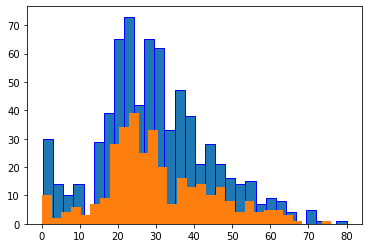

In [193]:
plt.hist(train.Age, bins=30,ec = 'b' )
plt.hist(test.Age, bins=30)


In [390]:
distribution = train.Age.value_counts(normalize=True)
missing = train['Age'].isnull()
train.loc[missing, 'Age'] = np.random.choice(distribution.index, size=len(train[missing]),p=distribution.values)

distribution = test.Age.value_counts(normalize=True)
missing = test['Age'].isnull()
test.loc[missing, 'Age'] = np.random.choice(distribution.index, size=len(test[missing]),p=distribution.values)

In [391]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


In [315]:
test

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,ticket,Fare,Cabin,Embarked
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30,1,2,113781,151.55,C22 C26,0
10,1,0,"Astor, Col. John Jacob",0,47,1,0,PC 17757,227.525,C62 C64,1
19,1,0,"Beattie, Mr. Thomson",0,36,0,0,13050,75.2417,C6,1
24,1,1,"Bird, Miss. Ellen",1,29,0,0,PC 17483,221.7792,C97,0
25,1,0,"Birnbaum, Mr. Jakob",0,25,0,0,13905,26,?,1
...,...,...,...,...,...,...,...,...,...,...,...
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,?,0
1296,3,0,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,?,0
1298,3,0,"Wittevrongel, Mr. Camille",0,36,0,0,345771,9.5,?,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5,0,0,2656,7.225,?,1


In [392]:
train['Age'] = train['Age'].astype(int)
train['age_range'] = pd.cut(train['Age'],5)

test['Age'] = test['Age'].astype(int)
test['age_range'] = pd.cut(test['Age'],5)

In [393]:
train.age_range.value_counts

<bound method IndexOpsMixin.value_counts of 0       (16.0, 32.0]
1       (32.0, 48.0]
2       (16.0, 32.0]
3       (32.0, 48.0]
4       (32.0, 48.0]
           ...      
886     (16.0, 32.0]
887     (16.0, 32.0]
888    (-0.08, 16.0]
889     (16.0, 32.0]
890     (16.0, 32.0]
Name: age_range, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]>

In [394]:
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age']> 16) & (train['Age']<=32), 'Age'] = 1
train.loc[(train['Age']> 32) & (train['Age']<=48), 'Age'] = 2
train.loc[(train['Age']> 48) & (train['Age']<=64), 'Age'] = 3
train.loc[(train['Age']> 64) & (train['Age']<=80), 'Age'] = 4

test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age']> 16) & (test['Age']<=32), 'Age'] = 1
test.loc[(test['Age']> 32) & (test['Age']<=48), 'Age'] = 2
test.loc[(test['Age']> 48) & (test['Age']<=64), 'Age'] = 3
test.loc[(test['Age']> 64) & (test['Age']<=80), 'Age'] = 4


In [395]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1,0,0,211536,13.0000,NaN,0,"(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,0,"(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,1,2,W./C. 6607,23.4500,NaN,0,"(-0.08, 16.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,1,0,0,111369,30.0000,C148,1,"(16.0, 32.0]"


Name

In [396]:
train.Name.value_counts()
test.Name.value_counts()

Rosenbaum, Miss. Edith Louise             1
Daly, Miss. Margaret Marcella Maggie""    1
Peruschitz, Rev. Joseph Maria             1
Faunthorpe, Mr. Harry                     1
Hocking, Miss. Ellen Nellie""             1
                                         ..
Harbeck, Mr. William H                    1
Case, Mr. Howard Brown                    1
Caram, Mr. Joseph                         1
Lamb, Mr. John Joseph                     1
Carrau, Mr. Jose Pedro                    1
Name: Name, Length: 418, dtype: int64

In [397]:
train['Name_split'] = train['Name'].str.split(',')
title = []
for i in range(len(train['Name_split'])):
    name_holder = train.Name_split[i]
    name_title = name_holder[1]
    name_title = name_title.split()
    name_title = name_title[0].replace('.','')
    title.append(name_title)
train['title'] = title

test['Name_split'] = test['Name'].str.split(',')
title = []
for i in range(len(test['Name_split'])):
    name_holder = test.Name_split[i]
    name_title = name_holder[1]
    name_title = name_title.split()
    name_title = name_title[0].replace('.','')
    title.append(name_title)
test['title'] = title

In [214]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title
0,1,0,3,0,1,1,0,0,Mr
1,2,1,1,1,2,1,0,1,Mrs
2,3,1,3,1,1,0,0,0,Miss
3,4,1,1,1,2,1,0,0,Mrs
4,5,0,3,0,2,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,0,Rev
887,888,1,1,1,1,0,0,0,Miss
888,889,0,3,1,2,1,2,0,Miss
889,890,1,1,0,1,0,0,1,Mr


In [398]:
train = train.drop(['Name', 'Name_split','Ticket','Fare','Cabin','age_range'], axis=1)
test = test.drop(['Name', 'Name_split','Ticket','Fare','Cabin','age_range'], axis=1)

In [231]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title
0,1,0,3,0,1,1,0,S,Mr
1,2,1,1,1,2,1,0,C,Mrs
2,3,1,3,1,1,0,0,S,Miss
3,4,1,1,1,2,1,0,S,Mrs
4,5,0,3,0,2,0,0,S,Mr
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,S,Rev
887,888,1,1,1,1,0,0,S,Miss
888,889,0,3,1,0,1,2,S,Miss
889,890,1,1,0,1,0,0,C,Mr


In [399]:
title_convert = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Dr':5,'Rev':6,'Others':7}

train['title'] = train['title'].replace(['Lady', 'Countess', 'Capt','Col','Don','Major','Sir','Jonkheer','Dona'],'Other')

train['title']= train['title'].replace('Mlle','Miss')
train['title']= train['title'].replace('Ms','Miss')
train['title']= train['title'].replace('Mme','Mrs')

train['title'] = train['title'].map(title_convert)
train['title'] = train['title'].fillna(0)

#######

test['title'] = test['title'].replace(['Lady', 'Countess', 'Capt','Col','Don','Major','Sir','Jonkheer','Dona'],'Other')

test['title']= test['title'].replace('Mlle','Miss')
test['title']= test['title'].replace('Ms','Miss')
test['title']= test['title'].replace('Mme','Mrs')

test['title'] = test['title'].map(title_convert)
test['title'] = test['title'].fillna(0)

In [236]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title
0,1,0,3,0,1,1,0,S,0.0
1,2,1,1,1,2,1,0,C,0.0
2,3,1,3,1,1,0,0,S,0.0
3,4,1,1,1,2,1,0,S,0.0
4,5,0,3,0,2,0,0,S,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,S,0.0
887,888,1,1,1,1,0,0,S,0.0
888,889,0,3,1,0,1,2,S,0.0
889,890,1,1,0,1,0,0,C,0.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,title
0,892,3,0,0,0,0,2,1.0
1,893,3,1,0,1,0,0,3.0
2,894,2,0,0,0,0,2,1.0
3,895,3,0,0,0,0,0,1.0
4,896,3,1,0,1,1,0,3.0
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,0,0,1.0
414,1306,1,1,0,0,0,1,0.0
415,1307,3,0,0,0,0,0,1.0
416,1308,3,0,0,0,0,0,1.0


Family size

In [400]:
train['family_members'] = train['SibSp'] + train['Parch']
test['family_members'] = test['SibSp'] + test['Parch']

In [266]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title,family_members
0,1,0,3,0,1,1,0,0,1.0,1
1,2,1,1,1,2,1,0,1,3.0,1
2,3,1,3,1,1,0,0,0,2.0,0
3,4,1,1,1,2,1,0,0,3.0,1
4,5,0,3,0,2,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,0,6.0,0
887,888,1,1,1,1,0,0,0,2.0,0
888,889,0,3,1,1,1,2,0,2.0,3
889,890,1,1,0,1,0,0,1,1.0,0


In [401]:
train = train.drop(['SibSp','Parch',], axis=1)
test = test.drop(['SibSp','Parch',], axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


# Modelling

In [404]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test

In [405]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [441]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_depth=4, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=0)

In [456]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X,y)
preds = dtc.predict(X_test)

In [457]:
preds = rfc.predict(X_test)

In [422]:
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [414]:
test

,PassengerId,Pclass,Sex,Age,Embarked,title,family_members
0,892,3,0,2,2,1.0,0
1,893,3,1,2,0,3.0,1
2,894,2,0,3,2,1.0,0
3,895,3,0,1,0,1.0,0
4,896,3,1,1,0,3.0,2
...,...,...,...,...,...,...,...
413,1305,3,0,1,0,1.0,0
414,1306,1,1,2,1,0.0,0
415,1307,3,0,2,0,1.0,0
416,1308,3,0,1,0,1.0,0


In [423]:
passengerid = test.PassengerId

In [458]:
my_submission = pd.DataFrame({'PassengerId':passengerid, 'Survived':preds})

In [459]:
my_submission.to_csv('gender_submission.csv', index=False)